# Supervised Learning : Regression task

## Context 1 

Imagine you're a data scientist working for a real estate company. The company has a large dataset of houses in Boston, and they want to understand how various features of a house affect its price. This understanding will help them make better decisions when buying and selling properties.

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts. This dataset is often used in machine learning for regression analysis examples and is widely available, such as in the scikit-learn Python library.

In this tutorial, you're tasked with creating a simple linear regression model that can predict the median value of owner-occupied homes (MEDV) based on the average number of rooms per dwelling (RM). This is a supervised learning task because we have labeled training data (we know the MEDV for each house in our training set).

The steps in the tutorial guide you through loading and exploring the data, selecting the feature (RM) and target (MEDV) variables, splitting the data into training and test sets, training a linear regression model on the training data, evaluating the model on the test data, and visualizing the regression line.

After following this tutorial, you'll have a basic understanding of how to perform simple linear regression using Python and scikit-learn. You'll also gain practical experience with various aspects of a supervised learning workflow, including data exploration, feature selection, model training, and model evaluation.

# I. Simple Linear Regression

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In this step, we import all the necessary Python libraries. Pandas and numpy are used for data manipulation, sklearn for machine learning tasks, and matplotlib and seaborn for data visualization.

## 2. Load the Boston Housing dataset

In [2]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

We load the Boston Housing dataset which is available in sklearn's datasets. We create a dataframe using pandas, with the data and column names from the Boston dataset. We then add a new column 'MEDV' to the dataframe, which is our target variable.

### Understanding the Data

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# description of the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 3. Exploratory Data Analysis

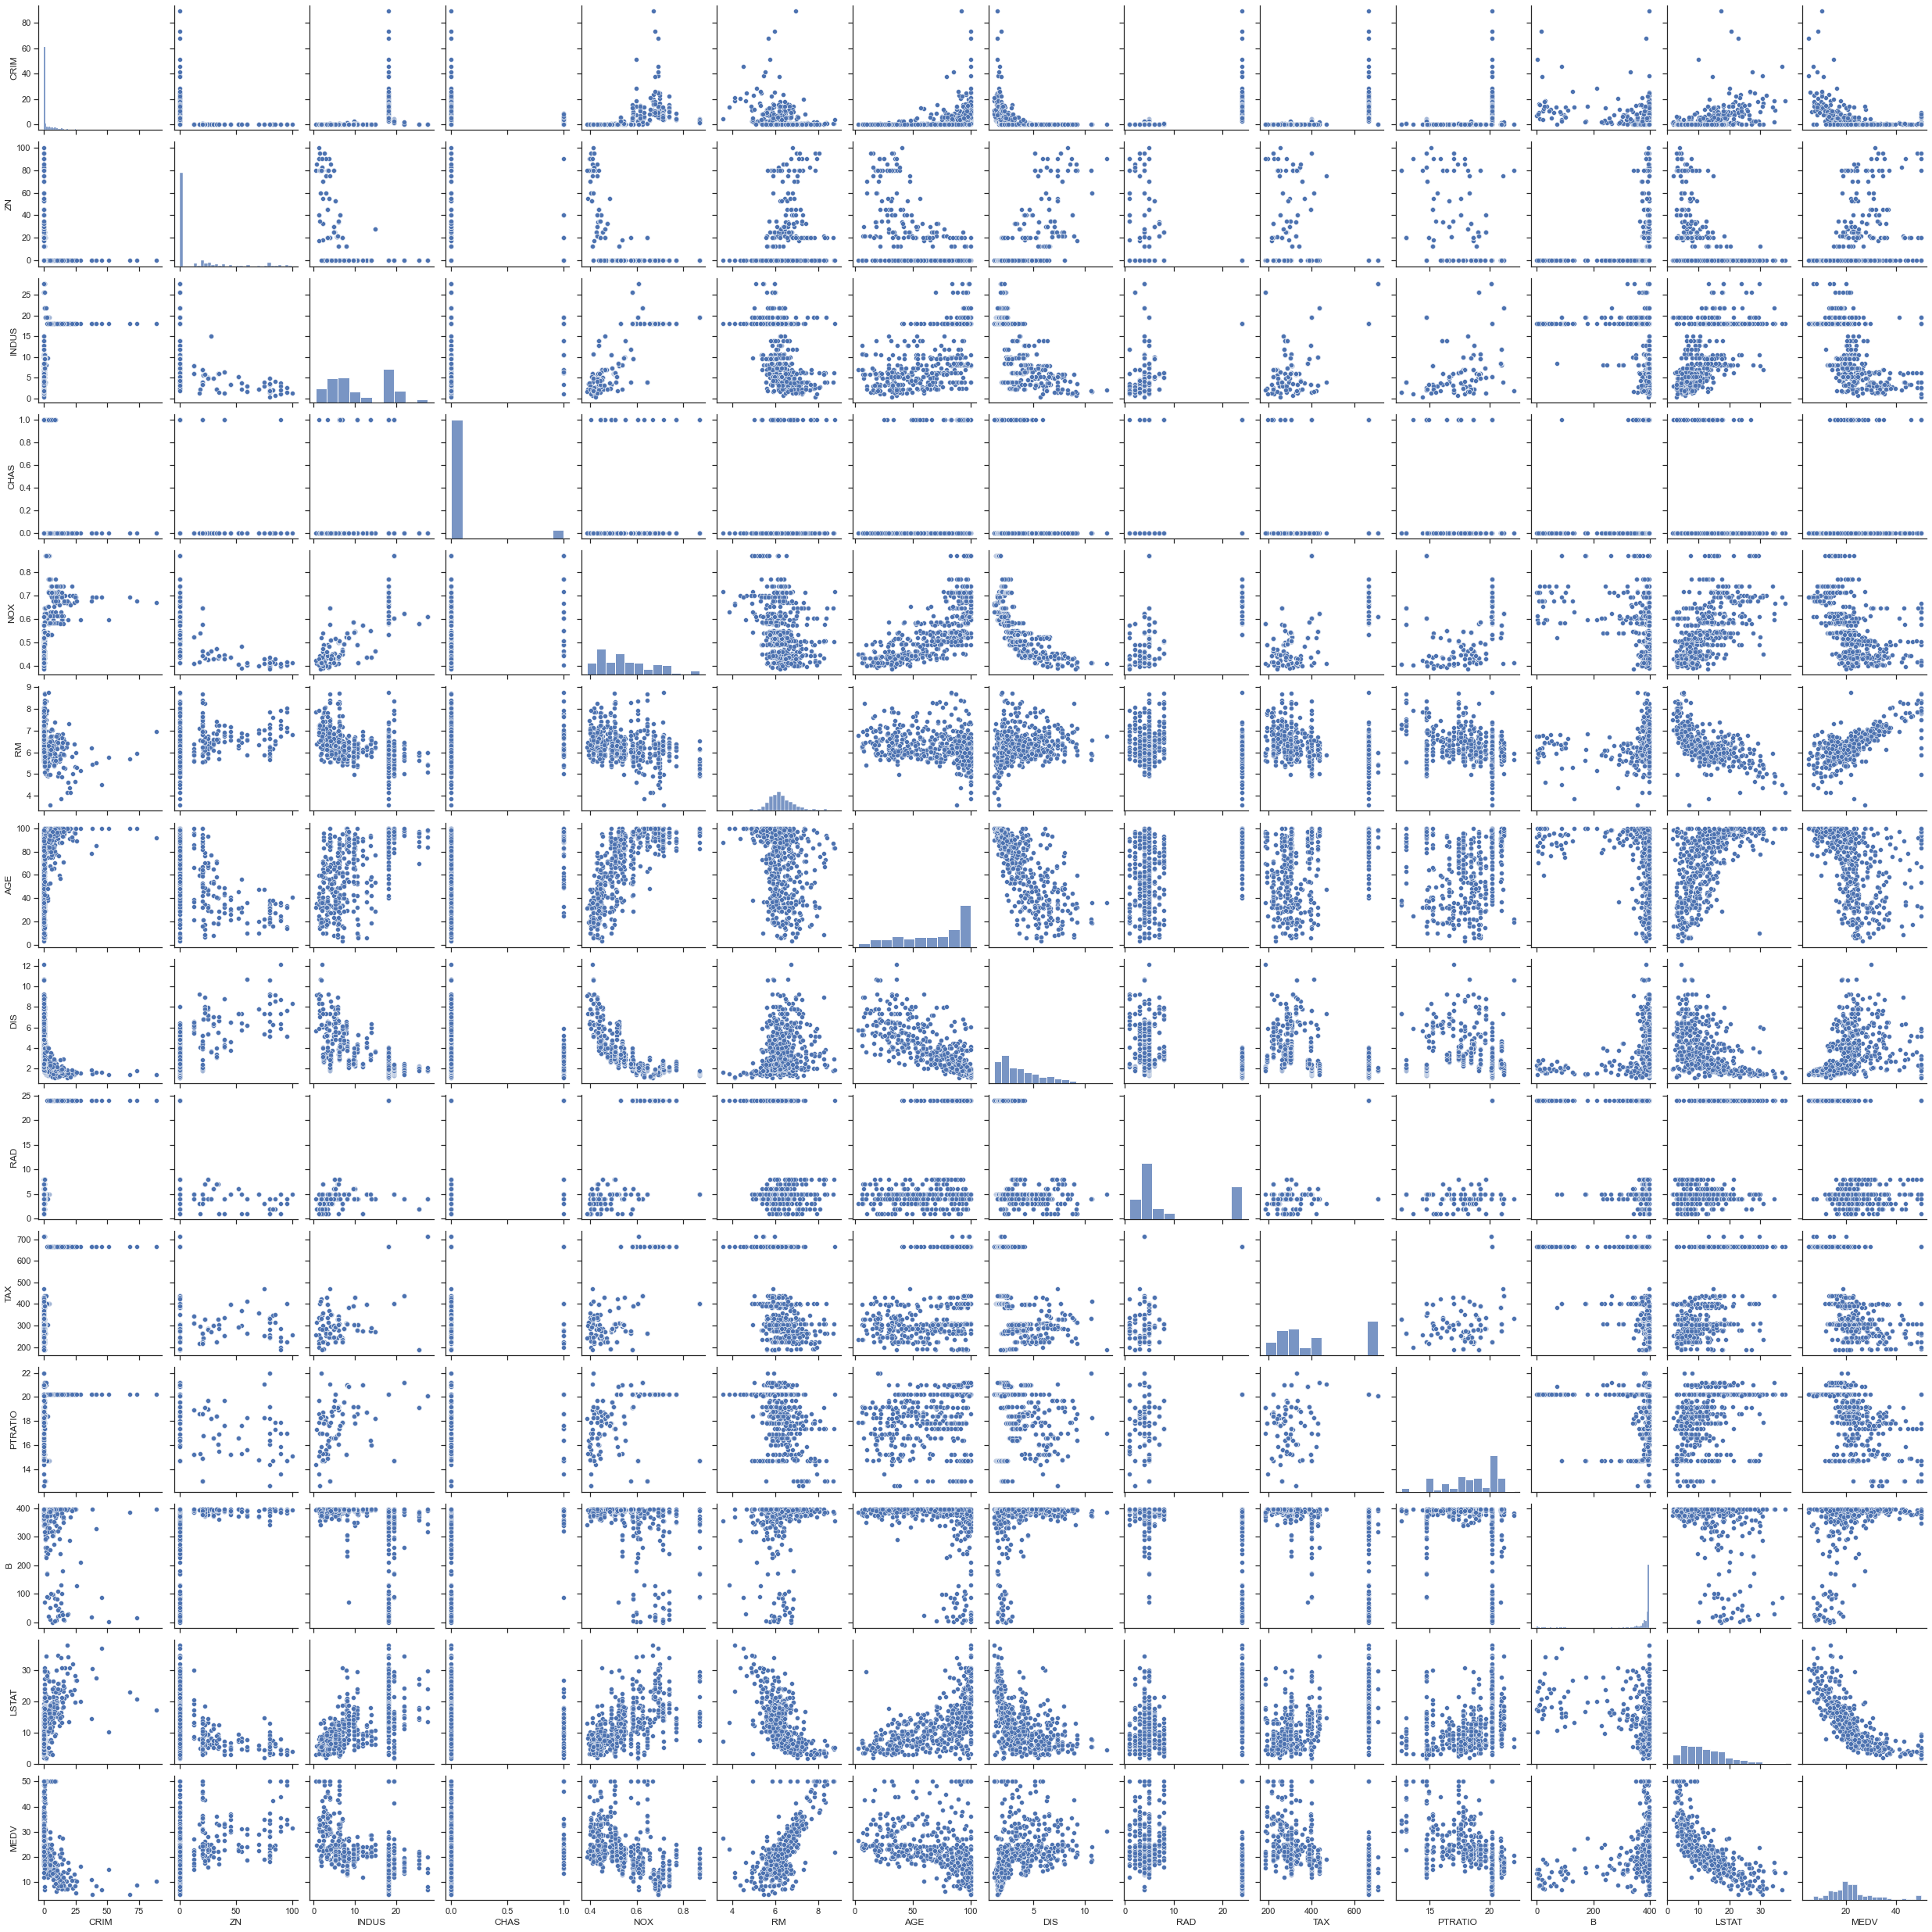

In [8]:
sns.pairplot(df)

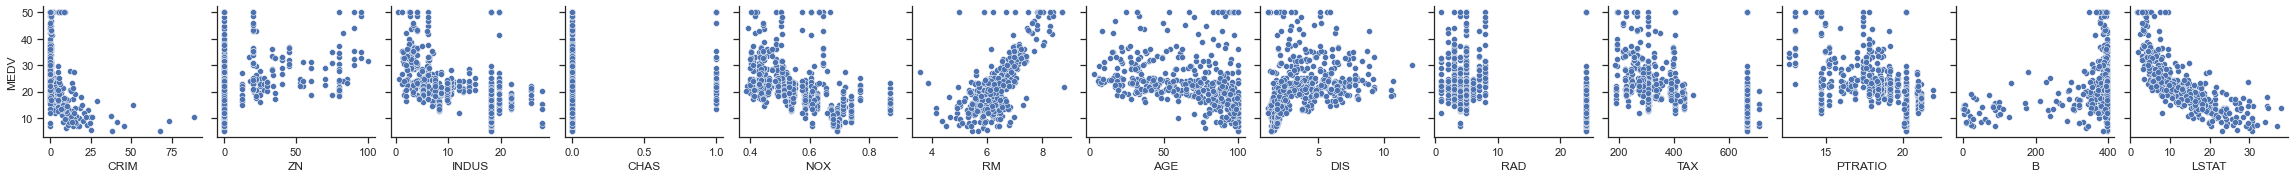

In [7]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, y_vars=["MEDV"], x_vars=boston_dataset.feature_names.tolist())

We create a pairplot which shows scatterplots between our chosen target variable (MEDV) and every feature in the dataset. This helps us visualize the relationship between the target and the features.

## 4. Choose one feature and split the data

In [16]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We choose the feature 'RM' (average number of rooms per dwelling) for our simple linear regression model. We create our feature set **X** and target **y** and split them into training and testing sets using a 80/20 split.

## 5. Train the Linear Regression model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We create a Linear Regression model and train it on our training data.

## 6. Evaluate the model

In [19]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.32474074001139
Mean Squared Error: 46.907351627395315
Root Mean Squared Error: 6.848894190115315


In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R²: {r2:.2f}')

MSE: 41.68, R²: 0.49


In [ ]:
y_pred_tr = model.predict(X_train)
r2_tr = metrics.r2_score(y_pred_tr, y_train)
r2_tr

0.6146883854001661

# Evaluating the training set

### Checking the overfitting

In [29]:
model.score(X_train, y_train)

0.721859247739624

In [33]:
model.score(X_test, y_test)

0.4881642015692509

Overfitting case

In [ ]:
score of 100% for trainint set 
score of 20% for test set

Underfitting case

In [ ]:
score of 20% for trainint set 
score of 6% for test set

We use our trained model to make predictions on the test set, and evaluate its performance by calculating the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error. These metrics give us a quantitative measure of how well our model is performing.

**Lower values for the error metrics indicate a better fit of the model to the data**

## 7. Visualize the model

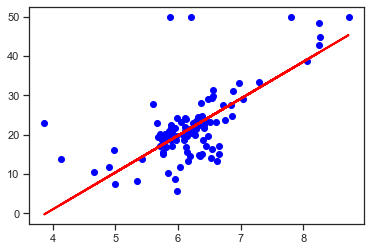

In [20]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Finally, we plot the test data points as a scatter plot, and the predicted regression line. This visualization helps us understand the fit of our model on the test data.

The plot provides a visual representation of this fit.

**Note:** This is a very basic example. In a real-world scenario, you would likely need to do more extensive data cleaning, feature engineering, and model tuning to achieve good results.

# Context 2 

Following the creation of the simple linear regression model using the Boston Housing dataset, your real estate company has been impressed with the initial results. However, they believe that the average number of rooms per dwelling (RM) might not be the only significant factor affecting the median value of owner-occupied homes (MEDV).

The management team has requested an extension of the model to incorporate more features in the prediction. Specifically, they are interested in seeing how the percentage of lower status population (LSTAT) and the pupil-teacher ratio by town (PTRATIO) may also influence housing prices.

As a data scientist, you now have the task to extend your simple linear regression model into a multiple linear regression model, incorporating these additional features. The company hopes that by taking into account these variables, the model's predictions will become more accurate and provide a better understanding of the housing market.

Following this, you will need to train the multiple linear regression model on the expanded feature set, evaluate its performance, and present the results to the management team. Remember, interpretability is key, so providing an understanding of how each feature impacts the housing price prediction will be highly valuable.

# II. Multiple linear Regression

## 1. Choose multiple features and split the data

In [21]:
X = df[['RM', 'LSTAT', 'PTRATIO']].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Here, we've chosen three features for our multiple linear regression model: 'RM' (average number of rooms per dwelling), 'LSTAT' (percentage lower status of the population), and 'PTRATIO' (pupil-teacher ratio by town). We create our feature set **X** and target **y** and split them into training and testing sets using a 80/20 split.

## 2. Train the Linear Regression model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We create a Linear Regression model and train it on our training data. This is the same step as in simple linear regression.

## 3. Evaluate the model

In [23]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.404434993909246
Mean Squared Error: 41.67799012221681
Root Mean Squared Error: 6.455849295190898


Again, we use our trained model to make predictions on the test set, and evaluate its performance by calculating the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

## 4. Show the model coefficients

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
feature_names = ['RM', 'LSTAT', 'PTRATIO']
coeff_df = pd.DataFrame(model.coef_, feature_names, columns=['Coefficient'])
print(coeff_df)

         Coefficient
RM          4.264947
LSTAT      -0.575521
PTRATIO    -1.136547


In multiple linear regression, it can be useful to look at the coefficients of the model to understand the impact of each feature on the prediction. This code creates a new dataframe with the feature names and corresponding coefficients.

The rest of the workflow is the same as in simple linear regression.

**Note:** In multiple regression, we cannot visualize the regression line as we did in simple linear regression, because we are now in a higher-dimensional space. However, we could visualize the relationship between the target and each individual feature.

Remember that multiple linear regression assumes that there is a **linear relationship between the features and the target variable**, and that the **features are not highly correlated with each other**. If these assumptions are violated, the model's predictions may be inaccurate. **Always make sure to check these assumptions when using multiple linear regression**.